## PCA on cleaned features

In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
from sklearn.preprocessing import StandardScaler

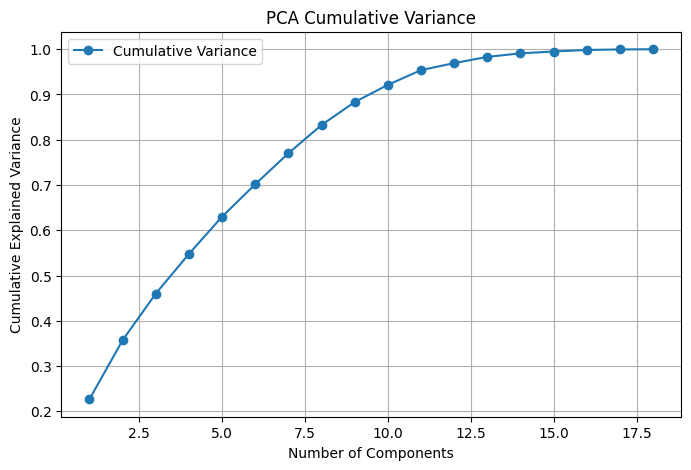

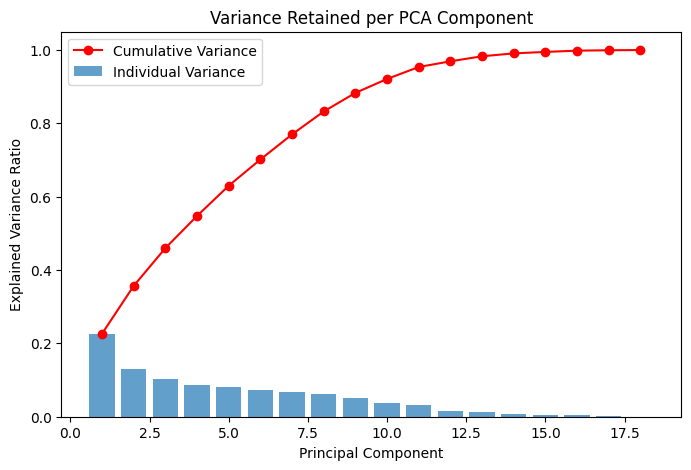

Chosen components (≈95% variance): 11


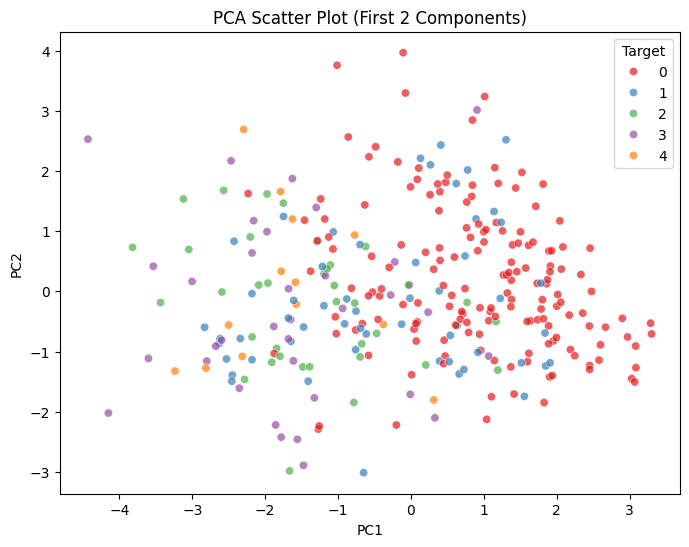

NameError: name 'joblib' is not defined

In [2]:
cleaned = pd.read_csv("../data/cleaned_heart.csv")
y = cleaned["target"]
X = cleaned.drop(columns=["target"])

# ------------------------------
# PCA with all components
# ------------------------------
pca = PCA(n_components=None, random_state=42)
X_pca = pca.fit_transform(X)

explained = pca.explained_variance_ratio_
cum_explained = explained.cumsum()

# ------------------------------
# 1. Cumulative variance plot
# ------------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained)+1), cum_explained, marker="o", label="Cumulative Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Variance")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------
# 2. Variance per component
# ------------------------------
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7, label="Individual Variance")
plt.plot(range(1, len(explained)+1), cum_explained, marker="o", color="red", label="Cumulative Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Variance Retained per PCA Component")
plt.legend()
plt.show()

# ------------------------------
# Determine minimal k for ~95% variance
# ------------------------------
k = int(np.argmax(cum_explained >= 0.95)) + 1
print(f"Chosen components (≈95% variance): {k}")

# ------------------------------
# PCA reduced to chosen components
# ------------------------------
pca_95 = PCA(n_components=k, random_state=42)
X_pca_95 = pca_95.fit_transform(X)

# ------------------------------
# 3. Scatter plot of first 2 PCs
# ------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_95[:,0], y=X_pca_95[:,1], hue=y, palette="Set1", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (First 2 Components)")
plt.legend(title="Target")
plt.show()

# ------------------------------
# Save model + datasets
# ------------------------------
Path("../models").mkdir(parents=True, exist_ok=True)
Path("../data").mkdir(parents=True, exist_ok=True)

joblib.dump(pca_95, "../models/pca_95.joblib")
pd.DataFrame(X_pca_95).to_csv("../data/pca_features.csv", index=False)
y.to_csv("../data/labels.csv", index=False)

print("✅ Saved PCA features and labels.")